# Importing Required Libraries

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
# import plotly.offline as py
import plotly.express as px

### DRIVE IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_csv("/content/drive/My Drive/FTDA/covid_19_data.csv")
data2 = pd.read_csv("/content/drive/My Drive/FTDA/daily_weather_2020.csv")

### Import from Runtime

In [ ]:
data1 = pd.read_csv("covid_19_data.csv")
data2 = pd.read_csv("daily_weather_2020.csv")

## Data Cleaning and Transformation

In [ ]:
data2['ObservationDate'] = pd.to_datetime(data2.time)
data1['ObservationDate'] = pd.to_datetime(data1.ObservationDate)

In [ ]:
data1.replace(to_replace='Mainland China',value='China',inplace=True)
data1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
98247,98248,2020-08-29,Zaporizhia Oblast,Ukraine,2020-08-30 04:28:22,1520.0,25.0,883.0
98248,98249,2020-08-29,Zeeland,Netherlands,2020-08-30 04:28:22,1048.0,72.0,0.0
98249,98250,2020-08-29,Zhejiang,China,2020-08-30 04:28:22,1277.0,1.0,1268.0
98250,98251,2020-08-29,Zhytomyr Oblast,Ukraine,2020-08-30 04:28:22,3155.0,61.0,1837.0


In [ ]:
data1['Country/Region'].replace(to_replace='Hong Kong',value='China',inplace=True)
data1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
98247,98248,2020-08-29,Zaporizhia Oblast,Ukraine,2020-08-30 04:28:22,1520.0,25.0,883.0
98248,98249,2020-08-29,Zeeland,Netherlands,2020-08-30 04:28:22,1048.0,72.0,0.0
98249,98250,2020-08-29,Zhejiang,China,2020-08-30 04:28:22,1277.0,1.0,1268.0
98250,98251,2020-08-29,Zhytomyr Oblast,Ukraine,2020-08-30 04:28:22,3155.0,61.0,1837.0


In [ ]:
data1['Country/Region'].replace(to_replace='Macau',value='China',inplace=True)
data1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
98247,98248,2020-08-29,Zaporizhia Oblast,Ukraine,2020-08-30 04:28:22,1520.0,25.0,883.0
98248,98249,2020-08-29,Zeeland,Netherlands,2020-08-30 04:28:22,1048.0,72.0,0.0
98249,98250,2020-08-29,Zhejiang,China,2020-08-30 04:28:22,1277.0,1.0,1268.0
98250,98251,2020-08-29,Zhytomyr Oblast,Ukraine,2020-08-30 04:28:22,3155.0,61.0,1837.0


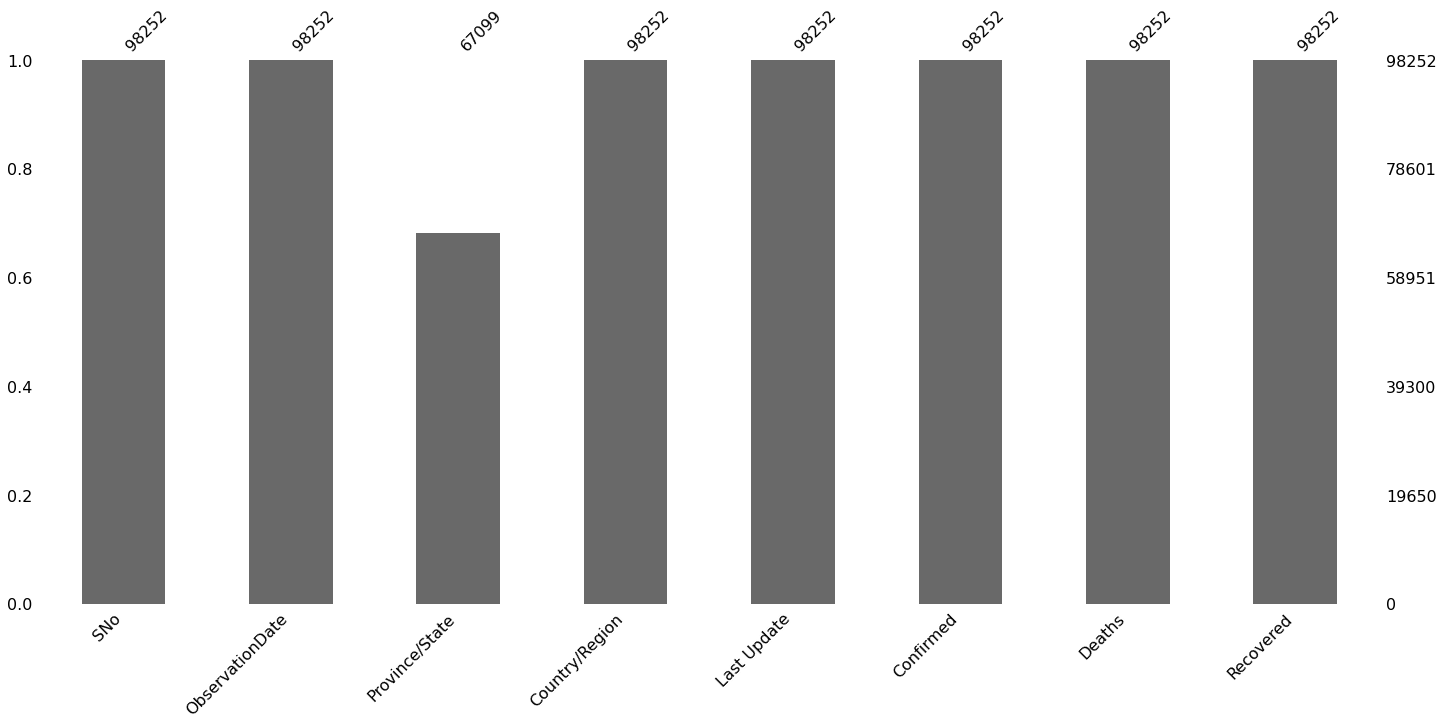

In [ ]:
import missingno as msno 
msno.bar(data1)

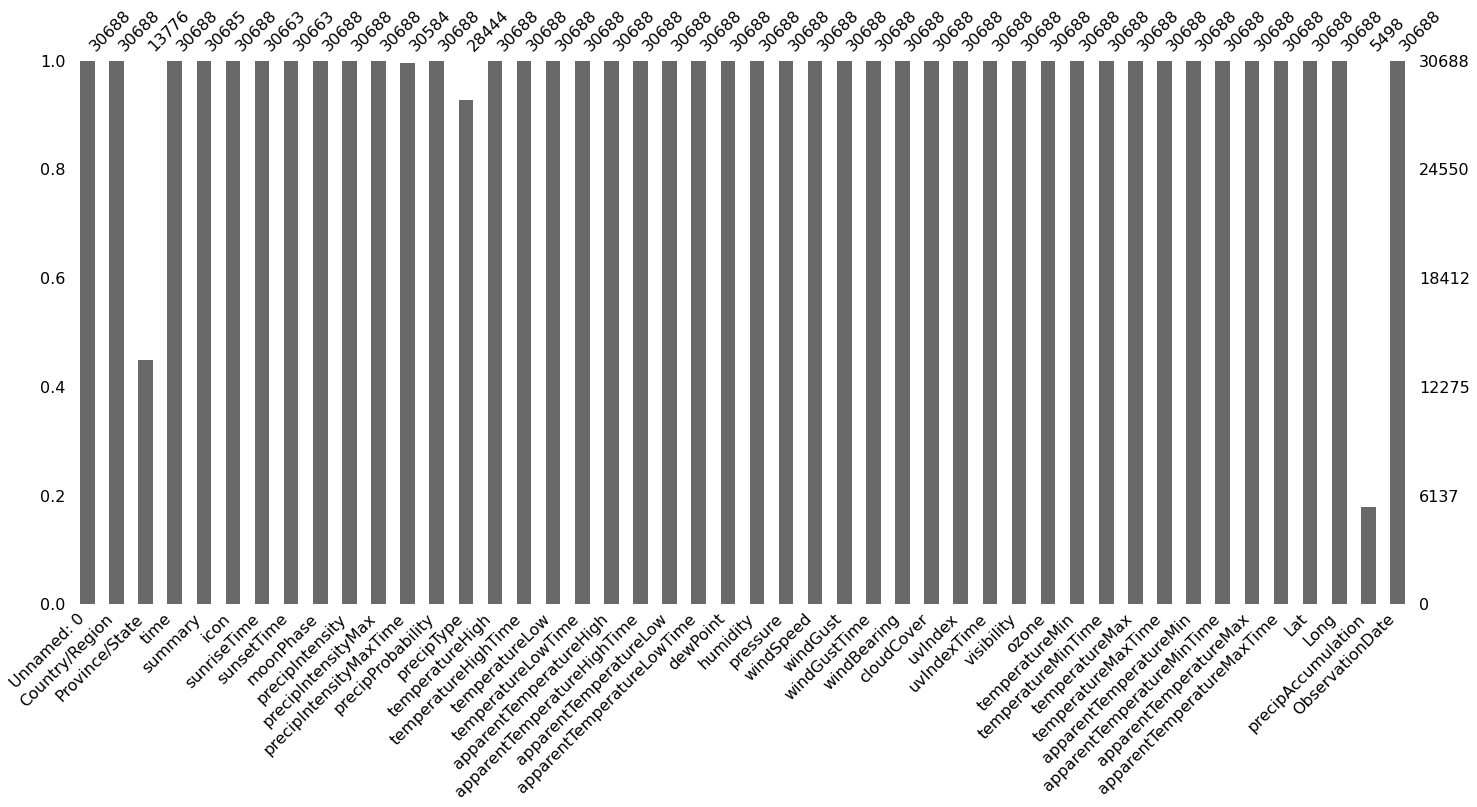

In [ ]:
msno.bar(data2)

We must remove the precipAccumulation column as it has 80% missing values

---



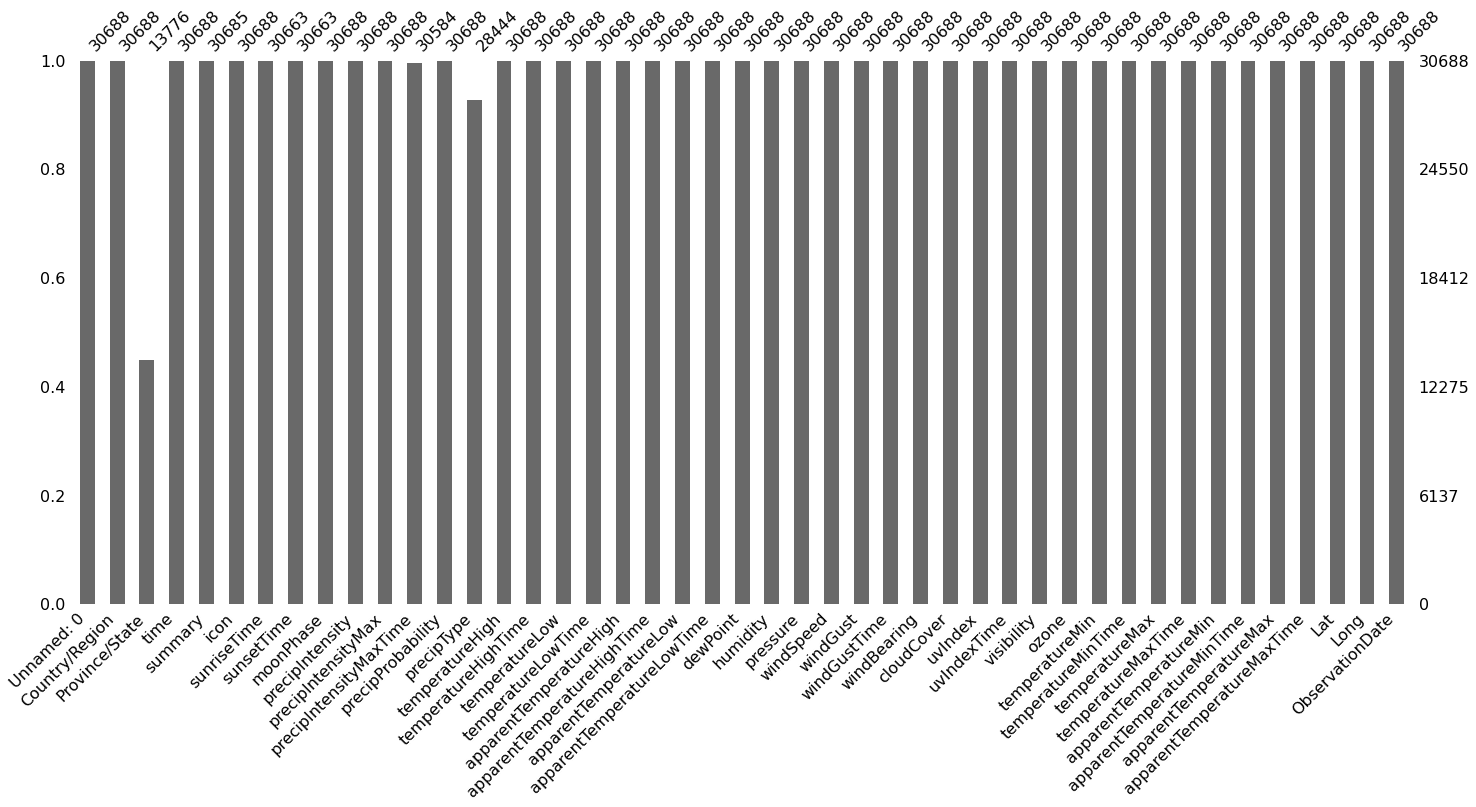

In [ ]:
data2 = data2.drop(labels='precipAccumulation', axis=1)
msno.bar(data2)

### Merging both tables by State/Province after removing the NA valued rows in both. Removing categorical variables as they are not relevant.

In [ ]:
d2 = data2[data2['Province/State'].notna()]
d1 = data1[data1['Province/State'].notna()]
data4 = pd.merge(d1,d2,
                 left_on=['Country/Region','Province/State','ObservationDate'],
                 right_on=['Country/Region','Province/State','ObservationDate'])
data5 = data4.drop(['time','summary','icon','Unnamed: 0','SNo','Last Update','precipType'],axis=1)

In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6247 entries, 0 to 6246
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ObservationDate              6247 non-null   datetime64[ns]
 1   Province/State               6247 non-null   object        
 2   Country/Region               6247 non-null   object        
 3   Confirmed                    6247 non-null   float64       
 4   Deaths                       6247 non-null   float64       
 5   Recovered                    6247 non-null   float64       
 6   sunriseTime                  6247 non-null   float64       
 7   sunsetTime                   6247 non-null   float64       
 8   moonPhase                    6247 non-null   float64       
 9   precipIntensity              6247 non-null   float64       
 10  precipIntensityMax           6247 non-null   float64       
 11  precipIntensityMaxTime       6247 non-null 

## To save merged dataset if needed for further analysis

In [ ]:
from google.colab import files

data5.to_csv('merged_data.csv')
files.download('merged_data.csv')

### Making key variables like humidity, wind Speed, etc to appear in the front

In [ ]:
col = data5.pop('humidity')
col1 = data5.pop('pressure')
col2 = data5.pop('windSpeed')
col3 = data5.pop('temperatureMax')
col4 = data5.pop('precipIntensity')
col5 = data5.pop('dewPoint')
data5.insert(6,'humidity',col)
data5.insert(7,'pressure',col1)
data5.insert(8,'windSpeed',col2)
data5.insert(9,'temperature(F)',col3)
data5.insert(10,'precipIntensity',col4)
data5.insert(11,'dewPoint',col5)

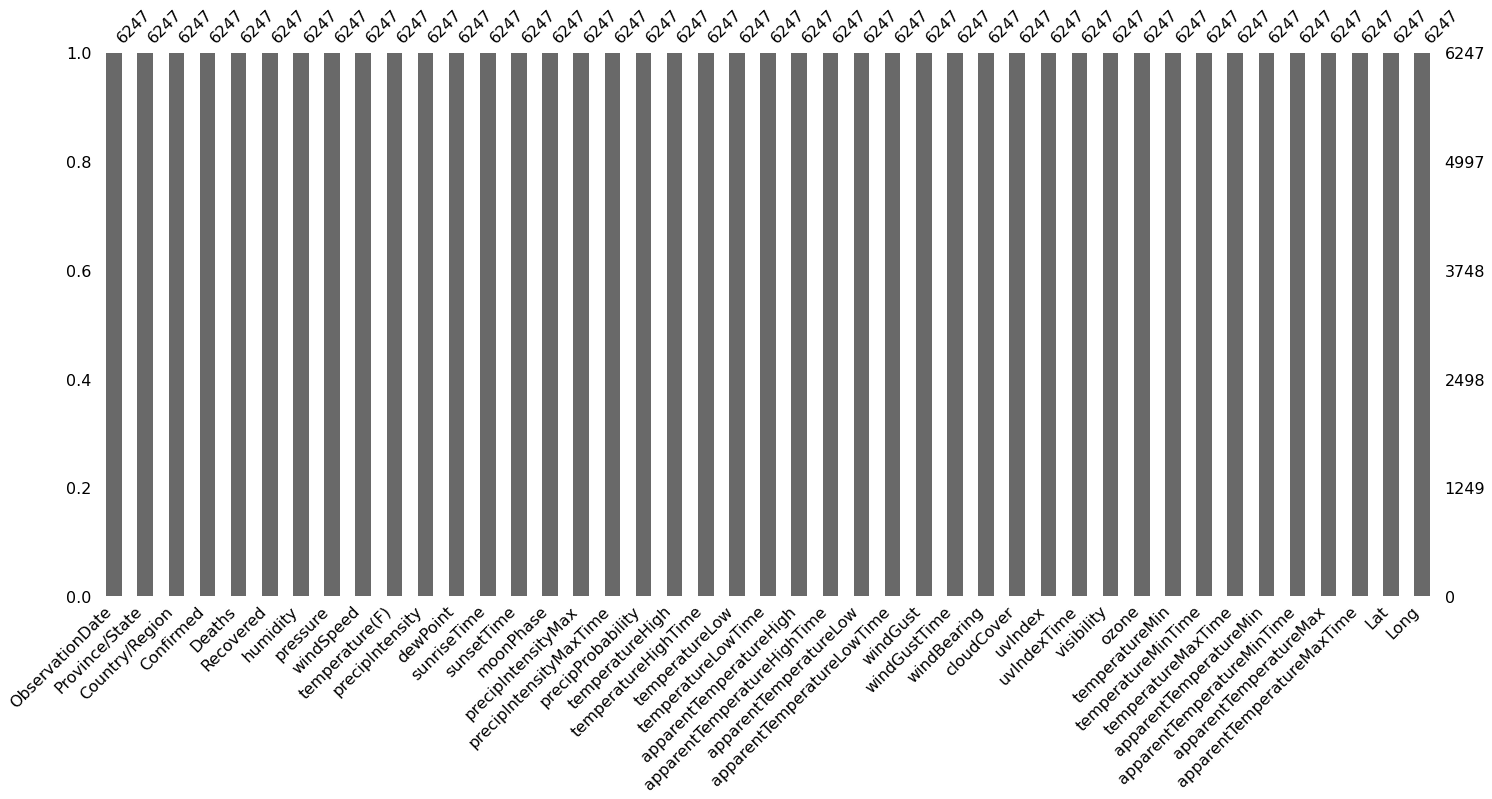

In [ ]:
msno.bar(data5)

## Number of Confirmed Cases vs Date

,Confirmed,Deaths,Recovered,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long
count,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6.247000e+03,6.247000e+03,6247.000000,6247.000000,6.247000e+03,6247.000000,6247.000000,6.247000e+03,6247.000000,6.247000e+03,6247.000000,6.247000e+03,6247.000000,6.247000e+03,6247.000000,6.247000e+03,6247.000000,6247.000000,6247.000000,6.247000e+03,6247.000000,6247.000000,6247.000000,6.247000e+03,6.247000e+03,6247.000000,6.247000e+03,6247.000000,6.247000e+03,6247.000000,6247.000000
mean,2816.445494,107.566352,616.858652,0.679918,1017.904450,7.462659,58.977562,0.004538,37.417223,1.584619e+09,1.584662e+09,0.540215,0.020902,1.584634e+09,0.301287,58.748758,1.584647e+09,41.630663,1.584700e+09,57.133608,1.584647e+09,39.086496,1.584699e+09,19.553045,1.584638e+09,169.035057,0.526416,5.373459,1.584641e+09,9.437341,325.519641,41.024745,1.584623e+09,1.584645e+09,38.332231,1.584622e+09,57.473533,1.584645e+09,29.105769,19.252587
std,13237.529618,706.225156,5242.249038,0.192689,7.365659,4.182102,18.302122,0.010680,22.378475,2.013806e+06,2.016352e+06,0.296032,0.055608,2.014543e+06,0.314870,18.420114,2.015249e+06,20.412353,2.013589e+06,22.147848,2.015143e+06,23.766101,2.013865e+06,9.458188,2.015312e+06,104.134343,0.305358,2.377304,2.015141e+06,1.435783,48.274367,20.527713,2.013926e+06,2.015272e+06,23.962895,2.014150e+06,21.898432,2.015219e+06,22.015279,104.214546
min,0.000000,0.000000,0.000000,0.060000,976.800000,0.960000,-3.770000,0.000000,-30.080000,1.579708e+09,1.579741e+09,0.000000,0.000000,1.579709e+09,0.000000,-3.770000,1.579716e+09,-24.370000,1.579750e+09,-21.840000,1.579716e+09,-38.560000,1.579780e+09,2.830000,1.579691e+09,0.000000,0.000000,1.000000,1.579724e+09,0.050000,235.800000,-35.860000,1.579696e+09,1.579716e+09,-47.500000,1.579695e+09,-21.840000,1.579709e+09,-41.454500,-157.498300
25%,37.000000,0.000000,0.000000,0.570000,1013.200000,4.360000,46.580000,0.000200,21.685000,1.583612e+09,1.583657e+09,0.270000,0.000600,1.583618e+09,0.050000,46.270000,1.583641e+09,29.485000,1.583688e+09,42.150000,1.583641e+09,24.705000,1.583686e+09,12.205000,1.583600e+09,77.000000,0.270000,4.000000,1.583634e+09,9.699000,284.000000,28.945000,1.583603e+09,1.583637e+09,23.910000,1.583599e+09,42.710000,1.583631e+09,26.815400,-84.670100
50%,180.000000,2.000000,0.000000,0.720000,1017.400000,6.520000,59.840000,0.000800,38.080000,1.584979e+09,1.585024e+09,0.580000,0.003000,1.585006e+09,0.150000,59.460000,1.585012e+09,41.390000,1.585058e+09,58.970000,1.585012e+09,38.770000,1.585058e+09,18.760000,1.585015e+09,164.000000,0.530000,5.000000,1.585002e+09,10.000000,322.500000,40.710000,1.584990e+09,1.585012e+09,38.100000,1.584987e+09,59.350000,1.585012e+09,35.745200,88.092400
75%,921.500000,7.000000,89.500000,0.820000,1022.600000,9.480000,73.530000,0.003700,54.690000,1.586210e+09,1.586256e+09,0.800000,0.017250,1.586226e+09,0.500000,73.500000,1.586242e+09,55.610000,1.586290e+09,73.195000,1.586242e+09,56.155000,1.586290e+09,25.570000,1.586232e+09,260.000000,0.800000,7.000000,1.586234e+09,10.000000,359.300000,54.870000,1.586210e+09,1.586242e+09,55.385000,1.586211e+09,73.250000,1.586242e+09,41.112900,115.722100
max,253060.000000,18611.000000,64435.000000,1.000000,1047.300000,33.620000,105.890000,0.280700,78.970000,1.587444e+09,1.587500e+09,1.000000,1.281300,1.587506e+09,1.000000,105.890000,1.587479e+09,81.360000,1.587527e+09,111.490000,1.587483e+09,91.080000,1.5875

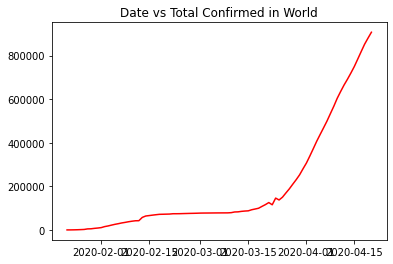

In [ ]:
timex = data5[['ObservationDate','Confirmed']]
timex = timex.groupby('ObservationDate').agg(sum).reset_index()
plt.plot(timex['ObservationDate'],timex['Confirmed'],color='red')
plt.title('Date vs Total Confirmed in World')
data5.describe()

## Considering values till March 15

In [ ]:
starting = data5[data5['ObservationDate'] <= pd.Timestamp(2020,3,15)]
perctry = starting.groupby('Country/Region')['Confirmed'].agg(sum).reset_index()
perctry

,Country/Region,Confirmed
0,Australia,2122.0
1,Canada,1287.0
2,China,2789865.0
3,Denmark,3576.0
4,France,17223.0
5,US,11905.0


We can see that China has very high number of cases compared to rest

In [ ]:
starting = starting[starting['Country/Region']=='China']
starting

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long
0,2020-01-22,Anhui,China,1.0,0.0,0.0,0.88,1024.6,7.13,49.02,0.0042,42.47,1.579735e+09,1.579772e+09,0.96,0.0227,1.579790e+09,0.72,49.02,1579766220,41.96,1579816440,44.55,1579765920,36.36,1579816800,19.84,1579772220,47,1.00,3,1579753260,10.000,300.1,42.29,1579709820,1579766220,39.86,1579712520,44.55,1579765920,31.8257,117.2264
1,2020-01-22,Beijing,China,14.0,0.0,0.0,0.45,1029.2,4.00,48.09,0.0001,12.71,1.579736e+09,1.579771e+09,0.96,0.0002,1.579745e+09,0.03,48.09,1579755900,22.42,1579822560,45.52,1579755900,22.91,1579822560,9.99,1579741560,356,0.09,2,1579753800,10.000,360.1,23.76,1579733160,1579755900,18.12,1579735800,45.52,1579755900,40.1824,116.4142
2,2020-01-22,Chongqing,China,6.0,0.0,0.0,0.84,1019.2,2.17,53.00,0.0037,45.22,1.579737e+09,1.579775e+09,0.96,0.0174,1.579715e+09,0.55,53.00,1579755480,45.25,1579822620,52.50,1579755480,45.74,1579822620,7.52,1579783800,20,0.98,3,1579755600,10.000,311.0,46.59,1579736580,1579755480,47.08,1579736580,52.50,1579755480,30.0572,107.8740
3,2020-01-22,Fujian,China,1.0,0.0,0.0,0.81,1018.1,2.51,74.81,0.0004,56.00,1.579734e+09,1.579773e+09,0.96,0.0013,1.579759e+09,0.13,74.81,1579764360,56.68,1579820400,74.31,1579764360,57.51,1579820460,12.79,1579759260,201,0.86,4,1579753140,10.000,249.3,52.74,1579733700,1579764360,53.23,1579733700,74.31,1579764360,26.0789,117.9874
4,2020-01-22,Gansu,China,0.0,0.0,0.0,0.44,1025.8,2.61,18.98,0.0001,-12.47,1.579739e+09,1.579775e+09,0.96,0.0003,1.579781e+09,0.05,18.98,1579763400,-3.89,1579823640,18.76,1579762020,-8.92,1579815780,5.25,1579770300,34,0.79,2,1579756740,10.000,341.3,-3.94,1579736580,1579763400,-3.58,1579780200,18.76,1579762020,37.8099,101.0583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2020-03-15,Inner Mongolia,China,75.0,1.0,71.0,0.47,1015.6,15.23,48.25,0.0000,18.12,1.584312e+09,1.584355e+09,0.75,0.0000,1.584342e+09,0.00,48.25,1584345600,19.80,1584395820,41.02,1584345720,13.23,1584394440,33.46,1584297060,293,0.12,4,1584333180,10.000,363.5,29.66,1584310860,1584345600,18.93,1584310440,41.02,1584345720,44.0935,113.9448
2196,2020-03-15,Ningxia,China,75.0,0.0,73.0,0.15,1022.9,8.19,59.84,0.0000,-0.60,1.584314e+09,1.584357e+09,0.75,0.0000,1.584295e+09,0.00,59.84,1584346320,30.44,1584399480,59.34,1584346320,26.08,1584399480,19.79,1584350160,306,0.69,4,1584337200,9.754,336.5,35.90,1584313380,1584346320,30.78,1584313260,59.34,1584346320,37.2692,106.1655
2222,2020-03-15,Qinghai,China,18.0,0.0,18.0,0.54,1024.2,3.81,21.80,0.0000,-7.93,1.584316e+09,1.584359e+09,0.75,0.0001,1.584288e+09,0.02,21.80,1584345540,-7.15,1584400140,13.51,1584345300,-15.91,1584400980,9.57,1584347580,16,0.89,5,1584338040,10.000,325.1,-9.37,1584315780,1584345540,-16.71,1584316920,13.51,1584345300,35.7452,95.9956
2233,2020-03-15,Macau,China,10.0,0.0,10.0,0.80,1019.4,13.13,70.82,0.0000,62.37,1.584312e+09,1.584355e+09,0.75,0.0001,1.584295e+09,0.03,70.82,1584348480,67.86,1584389220,70.60,1584348600,69.22,1584389040,23.63,1584328680,94,0.60,8,1584331560,9.915,268.4,66.01,1584303000,1584348480,66.75,1584303000,70.74,1584365040,22.1667,113.5500


## Considering values after March 15

In [ ]:
rest = data5[data5['ObservationDate'] > pd.Timestamp(2020,3,15)]
perctry = rest.groupby('Country/Region')['Confirmed'].agg(sum).reset_index()
perctry

,Country/Region,Confirmed
0,Australia,155036.0
1,Canada,499212.0
2,China,2874452.0
3,Denmark,12280.0
4,France,101777.0
5,Netherlands,16564.0
6,US,11109036.0


We can remove Denmark and Netherlands

In [ ]:
rest = rest[rest['Country/Region']!='Denmark'] 
rest = rest[rest['Country/Region']!='Netherlands']
rest

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long
2265,2020-03-16,Hubei,China,67798.0,3099.0,55142.0,0.58,1019.4,4.61,78.15,0.0001,45.31,1.584398e+09,1.584442e+09,0.79,0.0005,1.584453e+09,0.03,78.15,1584431700,47.58,1584484680,77.65,1584431700,46.56,1584484860,20.47,1584446400,214,0.73,4,1584419220,10.000,331.6,50.26,1584383220,1584431700,50.75,1584383220,77.65,1584431700,30.9756,112.2707
2266,2020-03-16,France,France,6633.0,148.0,12.0,0.76,1029.4,2.40,63.73,0.0003,44.37,1.584425e+09,1.584468e+09,0.80,0.0010,1.584400e+09,0.12,63.73,1584452820,36.65,1584507600,63.23,1584452820,37.14,1584507600,9.80,1584461940,65,0.81,3,1584446400,10.000,356.8,43.62,1584420360,1584452820,44.11,1584420360,63.23,1584452820,46.2276,2.2137
2268,2020-03-16,Guangdong,China,1361.0,8.0,1306.0,0.86,1018.9,4.52,72.45,0.0011,63.13,1.584398e+09,1.584441e+09,0.79,0.0035,1.584436e+09,0.35,72.45,1584421140,64.48,1584475200,72.52,1584421200,65.72,1584475080,13.78,1584406920,134,0.99,5,1584419700,10.000,274.8,63.47,1584389100,1584421140,64.23,1584388920,72.52,1584421200,23.3417,113.4244
2269,2020-03-16,Zhejiang,China,1231.0,1.0,1216.0,0.73,1020.1,2.93,63.11,0.0002,47.37,1.584396e+09,1.584440e+09,0.79,0.0009,1.584421e+09,0.12,63.11,1584420840,50.34,1584476400,62.61,1584420840,50.83,1584476400,6.09,1584424980,194,1.00,4,1584418200,10.000,308.9,50.56,1584390960,1584420840,51.05,1584390960,62.61,1584420840,29.1832,120.0934
2270,2020-03-16,Hunan,China,1018.0,4.0,1014.0,0.96,1021.5,2.02,59.21,0.0184,53.88,1.584398e+09,1.584442e+09,0.79,0.0634,1.584387e+09,0.96,59.21,1584432120,48.56,1584475680,58.71,1584432120,48.37,1584476280,5.76,1584392880,330,0.99,4,1584420420,9.226,308.1,52.51,1584401820,1584432120,52.99,1584401880,58.71,1584432120,27.6104,111.7088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,2020-04-20,Western Australia,Australia,541.0,7.0,340.0,0.76,1015.9,8.01,75.40,0.0022,60.06,1.587423e+09,1.587463e+09,0.95,0.0127,1.587405e+09,0.23,75.40,1587445500,62.85,1587499500,74.92,1587445440,63.40,1587500460,12.72,1587444780,307,0.42,6,1587441780,10.000,263.8,62.75,1587422760,1587445500,63.27,1587422700,74.92,1587445440,-31.9505,115.8605
6243,2020-04-20,Wisconsin,US,4499.0,230.0,0.0,0.63,1003.4,12.86,57.37,0.0055,30.29,1.587381e+09,1.587430e+09,0.94,0.0361,1.587427e+09,0.68,57.37,1587402540,25.87,1587468720,56.87,1587402540,14.80,1587469380,34.50,1587437940,264,0.22,5,1587403440,10.000,376.1,29.44,1587370440,1587402540,24.36,1587379740,56.87,1587402540,44.2685,-89.6165
6244,2020-04-20,Wyoming,US,317.0,2.0,0.0,0.53,1014.1,7.89,50.95,0.0007,19.98,1.587385e+09,1.587434e+09,0.94,0.0021,1.587424e+09,0.06,50.95,1587422940,30.06,1587468480,50.35,1587423420,24.57,1587469620,21.20,1587394560,294,0.01,8,1587409680,10.000,337.0,27.23,1587375180,1587422940,19.50,1587379620,50.35,1587423420,42.7560,-107.3025
6245,2020-04-20,Xinjiang,China,76.0,3.0,73.0,0.40,1017.0,5.68,75.56,0.0006,38.13,1.587425e+09,1.587474e+09,0.95,0.0038,1.587427e+09,0.11,75.56,1587467160,50.73,1587511380,75.06,1587467160,51.22,1587511380,20.54,1587430740,29,0.30,6,1587448860,10.000,358.7,54.35,1587422580,1587467160,54.84,1587422580,75.06,1587467160,41.1129,85.2401


## Correlation

### Considering only China till March 15

In [ ]:
starting_corr = starting[['humidity','pressure','windSpeed','temperature(F)','precipIntensity','dewPoint','Confirmed']]
starting_corr.corr().style.background_gradient('RdPu')

,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,Confirmed
humidity,1.000000,-0.311378,-0.097970,0.335954,0.417671,0.777567,0.051821
pressure,-0.311378,1.000000,-0.072364,-0.477039,-0.185441,-0.470414,-0.011034
windSpeed,-0.097970,-0.072364,1.000000,0.046163,0.020275,0.042385,0.041372
temperature(F),0.335954,-0.477039,0.046163,1.000000,0.083821,0.836557,0.135778
precipIntensity,0.417671,-0.185441,0.020275,0.083821,1.000000,0.278180,-0.006092
dewPoint,0.777567,-0.470414,0.042385,0.836557,0.278180,1.000000,0.112618
Confirmed,0.051821,-0.011034,0.041372,0.135778,-0.006092,0.112618,1.000000


### Considering all countries except Denmark and Netherlands after March 15

In [ ]:
rest_corr = rest[['humidity','pressure','windSpeed','temperature(F)','precipIntensity','dewPoint','Confirmed']]
rest_corr.corr().style.background_gradient('magma')

,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,Confirmed
humidity,1.000000,-0.101759,-0.055785,-0.003763,0.388364,0.594719,0.010100
pressure,-0.101759,1.000000,-0.185141,-0.191265,-0.177658,-0.210865,-0.081408
windSpeed,-0.055785,-0.185141,1.000000,-0.034610,0.044619,0.009260,0.004861
temperature(F),-0.003763,-0.191265,-0.034610,1.000000,0.005800,0.772536,-0.033052
precipIntensity,0.388364,-0.177658,0.044619,0.005800,1.000000,0.213470,0.027732
dewPoint,0.594719,-0.210865,0.009260,0.772536,0.213470,1.000000,-0.018931
Confirmed,0.010100,-0.081408,0.004861,-0.033052,0.027732,-0.018931,1.000000


### Considering full dataset

In [ ]:
full_corr = data5[['humidity','pressure','windSpeed','temperature(F)','precipIntensity','dewPoint','Confirmed']]
full_corr.corr().style.background_gradient('viridis')

,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,Confirmed
humidity,1.000000,-0.169186,-0.019024,0.102810,0.371886,0.623454,0.012469
pressure,-0.169186,1.000000,-0.247153,-0.361239,-0.187825,-0.366150,-0.079424
windSpeed,-0.019024,-0.247153,1.000000,0.073616,0.069758,0.117169,0.005763
temperature(F),0.102810,-0.361239,0.073616,1.000000,0.036020,0.818560,0.009431
precipIntensity,0.371886,-0.187825,0.069758,0.036020,1.000000,0.214492,0.020328
dewPoint,0.623454,-0.366150,0.117169,0.818560,0.214492,1.000000,0.010711
Confirmed,0.012469,-0.079424,0.005763,0.009431,0.020328,0.010711,1.000000


### Correlation matrix for all days after Feb

In [ ]:
data_for_corr = data5[['ObservationDate','humidity','pressure','windSpeed','temperature(F)','precipIntensity','dewPoint','Confirmed']]
data_for_corr = data_for_corr[data_for_corr['ObservationDate']>=pd.Timestamp(2020,2,1)]
data_for_corr.pop('ObservationDate')
data_for_corr.describe()

,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,Confirmed
count,5912.000000,5912.000000,5912.000000,5912.000000,5912.000000,5912.000000,5912.000000
mean,0.679892,1017.555819,7.588185,59.720345,0.004539,38.087143,2969.998309
std,0.194092,7.295725,4.192410,18.058049,0.010563,22.273090,13590.769568
min,0.060000,976.800000,0.960000,-3.770000,0.000000,-30.080000,0.000000
25%,0.570000,1013.000000,4.510000,47.600000,0.000200,22.397500,51.000000
50%,0.720000,1017.100000,6.670000,60.705000,0.000800,38.860000,217.000000
75%,0.820000,1022.000000,9.570000,74.062500,0.003800,55.545000,943.750000
max,1.000000,1047.300000,33.620000,95.920000,0.280700,78.970000,253060.000000


In [ ]:
data_for_corr.corr().style.background_gradient('viridis')

,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,Confirmed
humidity,1.000000,-0.164616,-0.023342,0.100226,0.369059,0.629051,0.012823
pressure,-0.164616,1.000000,-0.227213,-0.330296,-0.186953,-0.340343,-0.072512
windSpeed,-0.023342,-0.227213,1.000000,0.045475,0.067674,0.094771,-0.000306
temperature(F),0.100226,-0.330296,0.045475,1.000000,0.035120,0.812250,0.000945
precipIntensity,0.369059,-0.186953,0.067674,0.035120,1.000000,0.214182,0.021294
dewPoint,0.629051,-0.340343,0.094771,0.812250,0.214182,1.000000,0.004619
Confirmed,0.012823,-0.072512,-0.000306,0.000945,0.021294,0.004619,1.000000


# PLOTS

## Pressure Values vs Confirmed Cases and Precipitation Intensity vs Confirmed

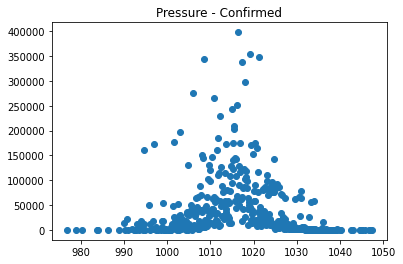

In [ ]:
pres = data5[['pressure','Confirmed']]
pres = pres.groupby('pressure').sum().reset_index()
plt.scatter(pres['pressure'],pres['Confirmed'])
plt.title('Pressure - Confirmed')
plt.show()
#pres

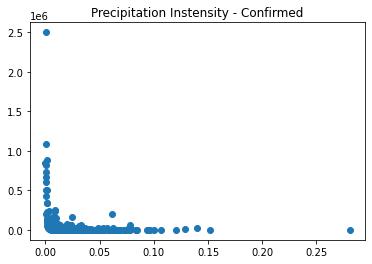

In [ ]:
prec = data5[['precipIntensity','Confirmed']]
prec = prec.groupby('precipIntensity').sum().reset_index()
plt.scatter(prec['precipIntensity'],prec['Confirmed'])
plt.title('Precipitation Instensity - Confirmed')
plt.show()

## Choose a Month to draw Graphs on

In [ ]:
#@title Choose Month Start and End. For eg if start_month = 2 month of Feb will be considered
start_month =  2#@param {type:"integer"}


In [ ]:
d = {}
d[2]='Feb'
d[3]='Mar'
d[4]='Apr'
d[5]='May'
d[6]='jun'
d[7]='Jul'
d[8]='Aug'

month = d[start_month]

In [ ]:
data6 = data5
data6 = data6[data6['ObservationDate']> pd.Timestamp(2020,start_month,1)]
data6 = data6[data6['ObservationDate']< pd.Timestamp(2020,start_month+1,1)]
print(data6)

     ObservationDate         Province/State  ...      Lat      Long
370       2020-02-02                  Hubei  ...  30.9756  112.2707
371       2020-02-02               Zhejiang  ...  29.1832  120.0934
372       2020-02-02              Guangdong  ...  23.3417  113.4244
373       2020-02-02                  Hunan  ...  27.6104  111.7088
374       2020-02-02                  Anhui  ...  31.8257  117.2264
...              ...                    ...  ...      ...       ...
1329      2020-02-29        New South Wales  ... -33.8688  151.2093
1330      2020-02-29        South Australia  ... -34.9285  138.6007
1331      2020-02-29      Western Australia  ... -31.9505  115.8605
1332      2020-02-29                  Tibet  ...  31.6927   88.0924
1333      2020-02-29  From Diamond Princess  ...  35.4437  139.6380

[964 rows x 43 columns]


In [ ]:
month_corr = data6[['humidity','pressure','windSpeed','temperature(F)','precipIntensity','dewPoint','Confirmed']]
month_corr.corr().style.background_gradient('copper')

,humidity,pressure,windSpeed,temperature(F),precipIntensity,dewPoint,Confirmed
humidity,1.000000,-0.367169,-0.022026,0.414333,0.313758,0.760408,0.038083
pressure,-0.367169,1.000000,-0.109712,-0.565488,-0.200930,-0.566287,0.043756
windSpeed,-0.022026,-0.109712,1.000000,0.084087,0.231017,0.113617,0.048985
temperature(F),0.414333,-0.565488,0.084087,1.000000,0.119260,0.892007,0.078424
precipIntensity,0.313758,-0.200930,0.231017,0.119260,1.000000,0.234442,-0.017524
dewPoint,0.760408,-0.566287,0.113617,0.892007,0.234442,1.000000,0.063285
Confirmed,0.038083,0.043756,0.048985,0.078424,-0.017524,0.063285,1.000000


# The Plots for selected month without considering the less number of cases in certain countries

## Plotting Pressure vs Wind Speed having Intensity values as Confirmed Cases

In [ ]:
fx = px.scatter(data6, x='pressure', y='windSpeed',title='Relation between Pressure-windSpeed for ' + month +' month',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

## Plotting Humidity vs Dew Point having Intensity values as Confirmed Cases

In [ ]:
fx = px.scatter(data6, x='humidity', y='dewPoint',title='Relation between Humidity-Dew Point for ' + month +' month',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

## Plotting Temperature vs Dew Point having Intensity values as Confirmed Cases

In [ ]:
fx = px.scatter(data6, x='temperature(F)', y='dewPoint',title='Relation between Temp-Dew Point for ' + month +' month', hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

# The Plots after considering before and After March 15 and removing few countries 

In [ ]:
# from plotly.subplots import make_subplots

In [ ]:
# fig = make_subplots(rows=2, cols=1, subplot_titles=("Relation between Pressure-windSpeed before 15 March", "Plot 2"))

# fig.append_trace(px.scatter(starting, x='pressure', y='windSpeed',title='Relation between Pressure-windSpeed before 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed'), row=1, col=1)
# fig.append_trace(px.scatter(rest, x='pressure', y='windSpeed',title='Relation between Pressure-windSpeed after 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed'),row =2,col=1)
# fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
# fig.show()

In [ ]:
fx = px.scatter(starting, x='pressure', y='windSpeed',title='Relation between Pressure-windSpeed before 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

In [ ]:
fx = px.scatter(rest, x='pressure', y='windSpeed',title='Relation between Pressure-windSpeed after 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

In [ ]:
fx = px.scatter(starting, x='dewPoint', y='temperature(F)',title='Relation between Dew Point-Temperature before 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

In [ ]:
fx = px.scatter(rest, x='humidity', y='precipIntensity',title='Relation between Humidity-Precipitation Intensity after 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

In [ ]:
fx = px.scatter(starting, x='humidity', y='precipIntensity',title='Relation between Humidity-Precipitation Intensity before 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

In [ ]:
fx = px.scatter(rest, x='dewPoint', y='temperature(F)',title='Relation between Dew Point-Temperature after 15 March',hover_name='ObservationDate',color='Confirmed',size='Confirmed')
fx.show()

# PREDICTION

In [ ]:
starting['temp'] = starting['temperature(F)']
col1 = starting.pop('temperature(F)')
#print(col1)
#starting['temp']

## Considering whole Dataset

Pressure and PrecipIntensity had highest correlation

In [ ]:
model = ols('Confirmed ~ pressure + precipIntensity', data=data5).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     19.91
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           2.39e-09
Time:                        18:21:43   Log-Likelihood:                -68133.
No. Observations:                6247   AIC:                         1.363e+05
Df Residuals:                    6244   BIC:                         1.363e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.462e+05   2.35e+04     

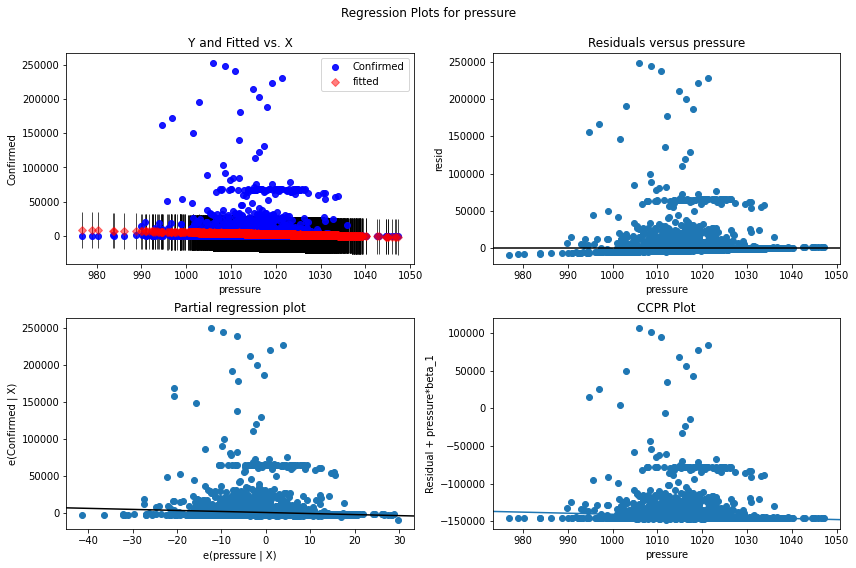

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'pressure', fig=fig)

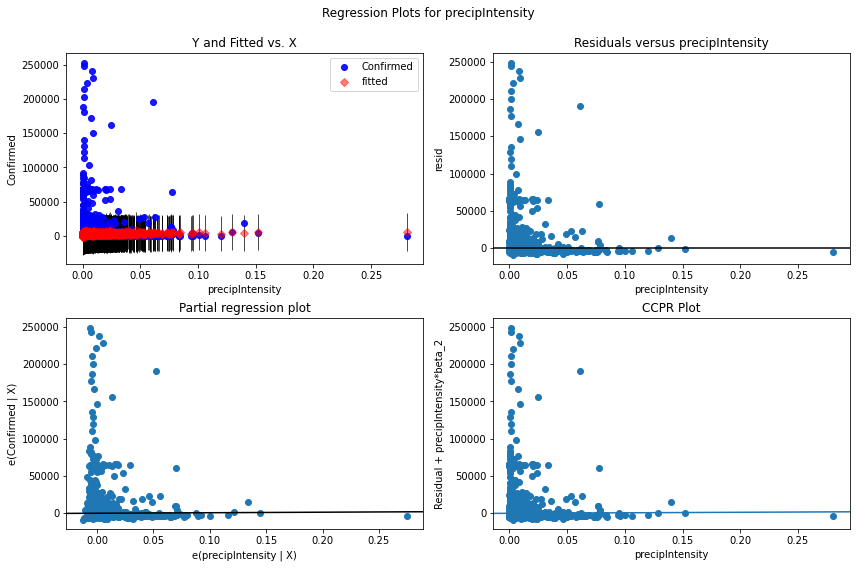

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'precipIntensity', fig=fig)

The R squared value is very low and residual plots are not good

### Applying Linear Regression per parameter and all parameters taken at once. XGBoost Regression also done in similar fashion

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#confirmed = data5['Confirmed']
print('Linear Regression\n')
reg = linear_model.LinearRegression()
for i in range(6):
    x = data5.iloc[:,i+6]
    print(data5.columns.values[i+6])
    y = data5['Confirmed']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
    X_train = np.asarray(X_train).reshape(-1,1)
    y_train = np.asarray(y_train).reshape(-1,1)
    reg.fit(X_train, y_train)
    acc_logg = round(reg.score(X_train, y_train) * 100, 2)
    print("Accuracy:",end='')
    print(round(acc_logg,2,), "%")  
    y_pred = reg.predict(np.asarray(X_test).reshape(-1,1))
    print("Mean squared error:",end='')
    print(mean_squared_error(y_test,y_pred))
    df = pd.DataFrame({'Actual': np.asarray(y_test).flatten(), 'Predicted': np.asarray(y_pred).flatten()})
    df
print('\nMultiple Linear Regression\n')
x = data5.iloc[:,6:12]
y = data5['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
reg.fit(X_train, y_train)
acc_logg = round(reg.score(X_train, y_train) * 100, 2)
print("Accuracy:",end='')
print(round(acc_logg,2,), "%")  
y_pred = reg.predict(X_test)
print("Mean squared error:",end='')
print(mean_squared_error(y_test,y_pred))
df = pd.DataFrame({'Actual': np.asarray(y_test).flatten(), 'Predicted': np.asarray(y_pred).flatten()})
df

print('\nXgboost regression\n')
#Xgboost regression
for i in range(6):
    x = data5.iloc[:,i+6]
    print(data5.columns.values[i+6])
    y = data5['Confirmed'] 
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                              colsample_bytree = 0.3,
                              learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    X_train = np.asarray(X_train).reshape(-1,1)
    y_train = np.asarray(y_train).reshape(-1,1)
    xg_reg.fit(X_train,y_train)
    acc_logg = round(xg_reg.score(X_train, y_train) * 100, 2)
    print("Accuracy:",end='')
    print(round(acc_logg,2,), "%") 
print('\nMultiple XGBoost Regression\n')
x = data5.iloc[:,6:12]
y = data5['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                              colsample_bytree = 0.3,
                              learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
acc_logg = round(xg_reg.score(X_train, y_train) * 100, 2)
print("Accuracy:",end='')
print(round(acc_logg,2,), "%")
y_pred = xg_reg.predict(X_test)
print("Mean squared error:",end='')
print(mean_squared_error(y_test,y_pred))       

Linear Regression

humidity
Accuracy:0.01 %
Mean squared error:160502285.9523542
pressure
Accuracy:0.71 %
Mean squared error:160143714.36193335
windSpeed
Accuracy:0.01 %
Mean squared error:160660550.88253382
temperature(F)
Accuracy:0.02 %
Mean squared error:160652927.9293288
precipIntensity
Accuracy:0.05 %
Mean squared error:160557462.4830262
dewPoint
Accuracy:0.02 %
Mean squared error:160590231.56392282

Multiple Linear Regression

Accuracy:0.77 %
Mean squared error:159935569.0909257

Xgboost regression

humidity
Accuracy:1.33 %
pressure
Accuracy:4.68 %
windSpeed
Accuracy:4.78 %
temperature(F)
Accuracy:2.93 %
precipIntensity
Accuracy:3.26 %
dewPoint
Accuracy:6.87 %

Multiple XGBoost Regression

Accuracy:5.62 %
Mean squared error:160845376.11034277


**Even after applying XGBoost, the maximum accuracy is less than 7%**

## For China Alone till March 15

Considering temp and dewPoint as they had maximum correlation

In [ ]:
model = ols('Confirmed ~ temp + dewPoint', data = starting).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     14.66
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           4.92e-07
Time:                        18:23:56   Log-Likelihood:                -16498.
No. Observations:                1564   AIC:                         3.300e+04
Df Residuals:                    1561   BIC:                         3.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2080.0422    935.784     -2.223      0.0

In [ ]:
x = starting[['temp','dewPoint']]
y = starting['Confirmed']
print('Multiple Linear Regression\n')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
reg.fit(X_train, y_train)
acc_logg = round(reg.score(X_train, y_train) * 100, 2)
print("Accuracy:",end='')
print(round(acc_logg,2,), "%")  
y_pred = reg.predict(X_test)
print("Mean squared error:",end='')
print(mean_squared_error(y_test,y_pred))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                              colsample_bytree = 0.3,
                              learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
acc_logg = round(xg_reg.score(X_train, y_train) * 100, 2)
print('\nXGBoost Regression\n')
print("Accuracy:",end='')
print(round(acc_logg,2,), "%")
y_pred = xg_reg.predict(X_test)
print("Mean squared error:",end='')
print(mean_squared_error(y_test,y_pred))

Multiple Linear Regression

Accuracy:1.78 %
Mean squared error:131662030.9657189

XGBoost Regression

Accuracy:17.43 %
Mean squared error:132672389.21902661


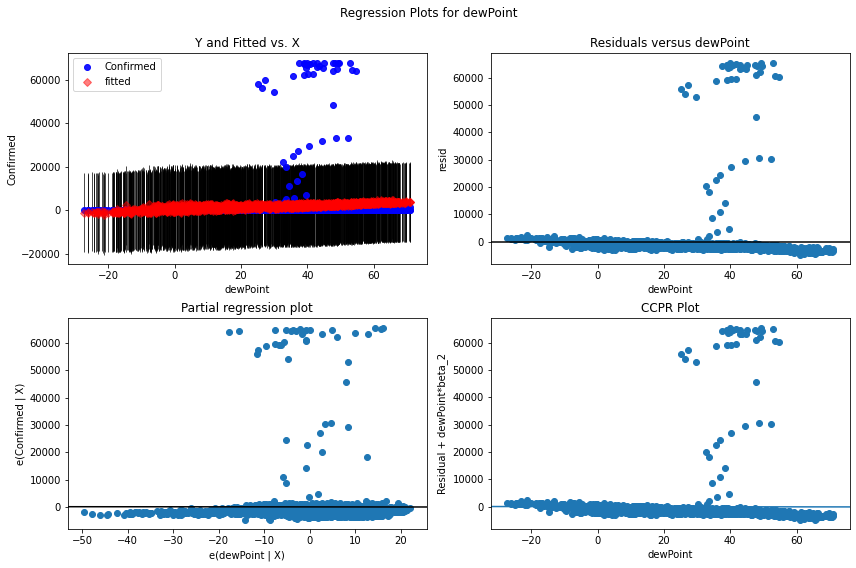

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'dewPoint', fig=fig)

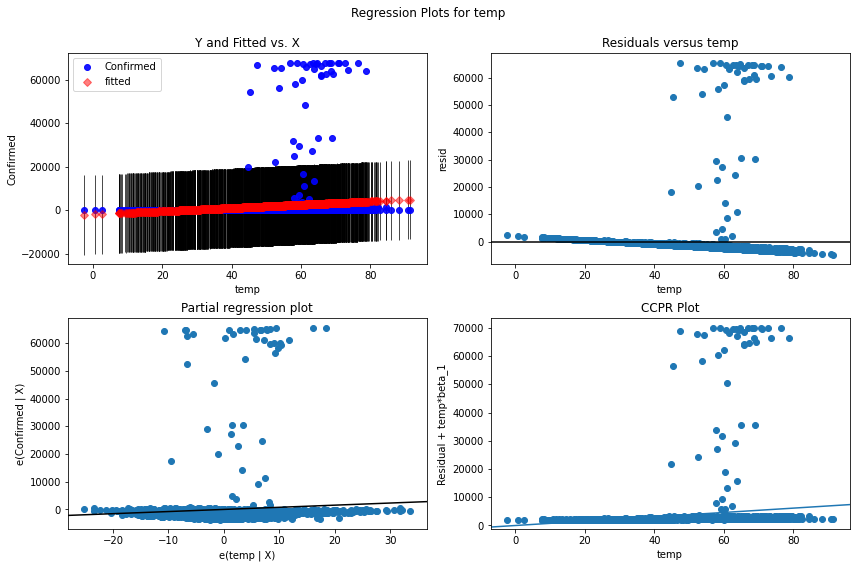

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'temp', fig=fig)

In [ ]:
print('Linear Regression\n')
reg = linear_model.LinearRegression()
for i in range(6):
    x = starting.iloc[:,i+6]
    print(data5.columns.values[i+6])
    y = starting['Confirmed']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
    X_train = np.asarray(X_train).reshape(-1,1)
    y_train = np.asarray(y_train).reshape(-1,1)
    reg.fit(X_train, y_train)
    acc_logg = round(reg.score(X_train, y_train) * 100, 2)
    print("Accuracy:",end='')
    print(round(acc_logg,2,), "%")  
    y_pred = reg.predict(np.asarray(X_test).reshape(-1,1))
    print("Mean squared error:",end='')
    print(mean_squared_error(y_test,y_pred))
    df = pd.DataFrame({'Actual': np.asarray(y_test).flatten(), 'Predicted': np.asarray(y_pred).flatten()})
    df
print('\nMultiple Linear Regression\n')
x = starting.iloc[:,6:12]
y = starting['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
reg.fit(X_train, y_train)
acc_logg = round(reg.score(X_train, y_train) * 100, 2)
print("Accuracy:",end='')
print(round(acc_logg,2,), "%")  
y_pred = reg.predict(X_test)
print("Mean squared error:",end='')
print(mean_squared_error(y_test,y_pred))
df = pd.DataFrame({'Actual': np.asarray(y_test).flatten(), 'Predicted': np.asarray(y_pred).flatten()})
df
###    Xgboost regression   ###
print('\nXgboost regression\n')

for i in range(6):
    x = starting.iloc[:,i+6]
    print(data5.columns.values[i+6])
    y = starting['Confirmed']
    #data_dmatrix = xgb.DMatrix(data=x,label=y)  
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                              colsample_bytree = 0.3,
                              learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    X_train = np.asarray(X_train).reshape(-1,1)
    y_train = np.asarray(y_train).reshape(-1,1)
    xg_reg.fit(X_train,y_train)
    acc_logg = round(xg_reg.score(X_train, y_train) * 100, 2)
    print("Accuracy:",end='')
    print(round(acc_logg,2,), "%") 
print('\nMultiple XGBoost Regression\n')
x = starting.iloc[:,6:12]
y = starting['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                              colsample_bytree = 0.3,
                              learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
acc_logg = round(xg_reg.score(X_train, y_train) * 100, 2)
print("Accuracy:",end='')
print(round(acc_logg,2,), "%")
y_pred = xg_reg.predict(X_test)
print("Mean squared error:",end='')
print(mean_squared_error(y_test,y_pred))  

Linear Regression

humidity
Accuracy:0.16 %
Mean squared error:133402991.36485693
pressure
Accuracy:0.01 %
Mean squared error:134114938.31468193
windSpeed
Accuracy:0.08 %
Mean squared error:133592498.4659517
temperature(F)
Accuracy:0.05 %
Mean squared error:134255218.0554253
precipIntensity
Accuracy:0.95 %
Mean squared error:131587790.05330543
dewPoint
Accuracy:0.77 %
Mean squared error:132045854.04261526

Multiple Linear Regression

Accuracy:2.79 %
Mean squared error:129751073.09657599

Xgboost regression

humidity
Accuracy:1.9 %
pressure
Accuracy:5.18 %
windSpeed
Accuracy:10.89 %
temperature(F)
Accuracy:2.54 %
precipIntensity
Accuracy:13.56 %
dewPoint
Accuracy:6.02 %

Multiple XGBoost Regression

Accuracy:8.1 %
Mean squared error:135276413.06475797


## Tree based methods:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import tree

x = data5.iloc[:,6:12]
y = data5['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=6)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 

# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('With max depth as 2\n')
print('Train Mean Squared Error ' + str(round(np.sqrt(mean_squared_error(y_train,tr1)),4))) 
print('R2 score ' + str(round(r2_score(y_train, tr1),4)))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('Test Mean Squared Error ' + str(round(np.sqrt(mean_squared_error(y_test,y1)),4))) 
print('R2 score ' + str(round(r2_score(y_test, y1),4))) 
print('')
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print('\nWith max depth as 6\n')
print('Train Mean Squared Error ' + str(round(np.sqrt(mean_squared_error(y_train,tr2)),4))) 
print('R2 score ' + str(round(r2_score(y_train, tr2),4)))

# Print RMSE and R-squared value for regression tree 'dtree12' on testing data
print('Test Mean Squared Error ' + str(round(np.sqrt(mean_squared_error(y_test,y2)),4))) 
print('R2 score ' + str(round(r2_score(y_test, y2),4))) 

With max depth as 2

Train Mean Squared Error 13219.6946
R2 score 0.023
Test Mean Squared Error 12738.2597
R2 score -0.0114


With max depth as 6

Train Mean Squared Error 11202.1765
R2 score 0.2984
Test Mean Squared Error 14964.3956
R2 score -0.3959


Decision tree visualization

In [ ]:
#Decision tree visualization (text)
text_rep1 = tree.export_text(dtree1)
text_rep2 = tree.export_text(dtree2)
print("Tree with depth: 2")
print(text_rep1)
print("Tree with depth: 6")
print(text_rep2)

Tree with depth: 2
|--- feature_1 <= 1008.65
|   |--- feature_1 <= 1008.55
|   |   |--- value: [6332.19]
|   |--- feature_1 >  1008.55
|   |   |--- value: [34369.30]
|--- feature_1 >  1008.65
|   |--- feature_5 <= 17.62
|   |   |--- value: [432.74]
|   |--- feature_5 >  17.62
|   |   |--- value: [3065.56]

Tree with depth: 6
|--- feature_1 <= 1008.65
|   |--- feature_1 <= 1008.55
|   |   |--- feature_4 <= 0.06
|   |   |   |--- feature_1 <= 997.10
|   |   |   |   |--- feature_1 <= 996.80
|   |   |   |   |   |--- feature_1 <= 994.65
|   |   |   |   |   |   |--- value: [3305.92]
|   |   |   |   |   |--- feature_1 >  994.65
|   |   |   |   |   |   |--- value: [32018.00]
|   |   |   |   |--- feature_1 >  996.80
|   |   |   |   |   |--- value: [172348.00]
|   |   |   |--- feature_1 >  997.10
|   |   |   |   |--- feature_2 <= 7.68
|   |   |   |   |   |--- feature_1 <= 1001.65
|   |   |   |   |   |   |--- value: [28452.86]
|   |   |   |   |   |--- feature_1 >  1001.65
|   |   |   |   |   |   |

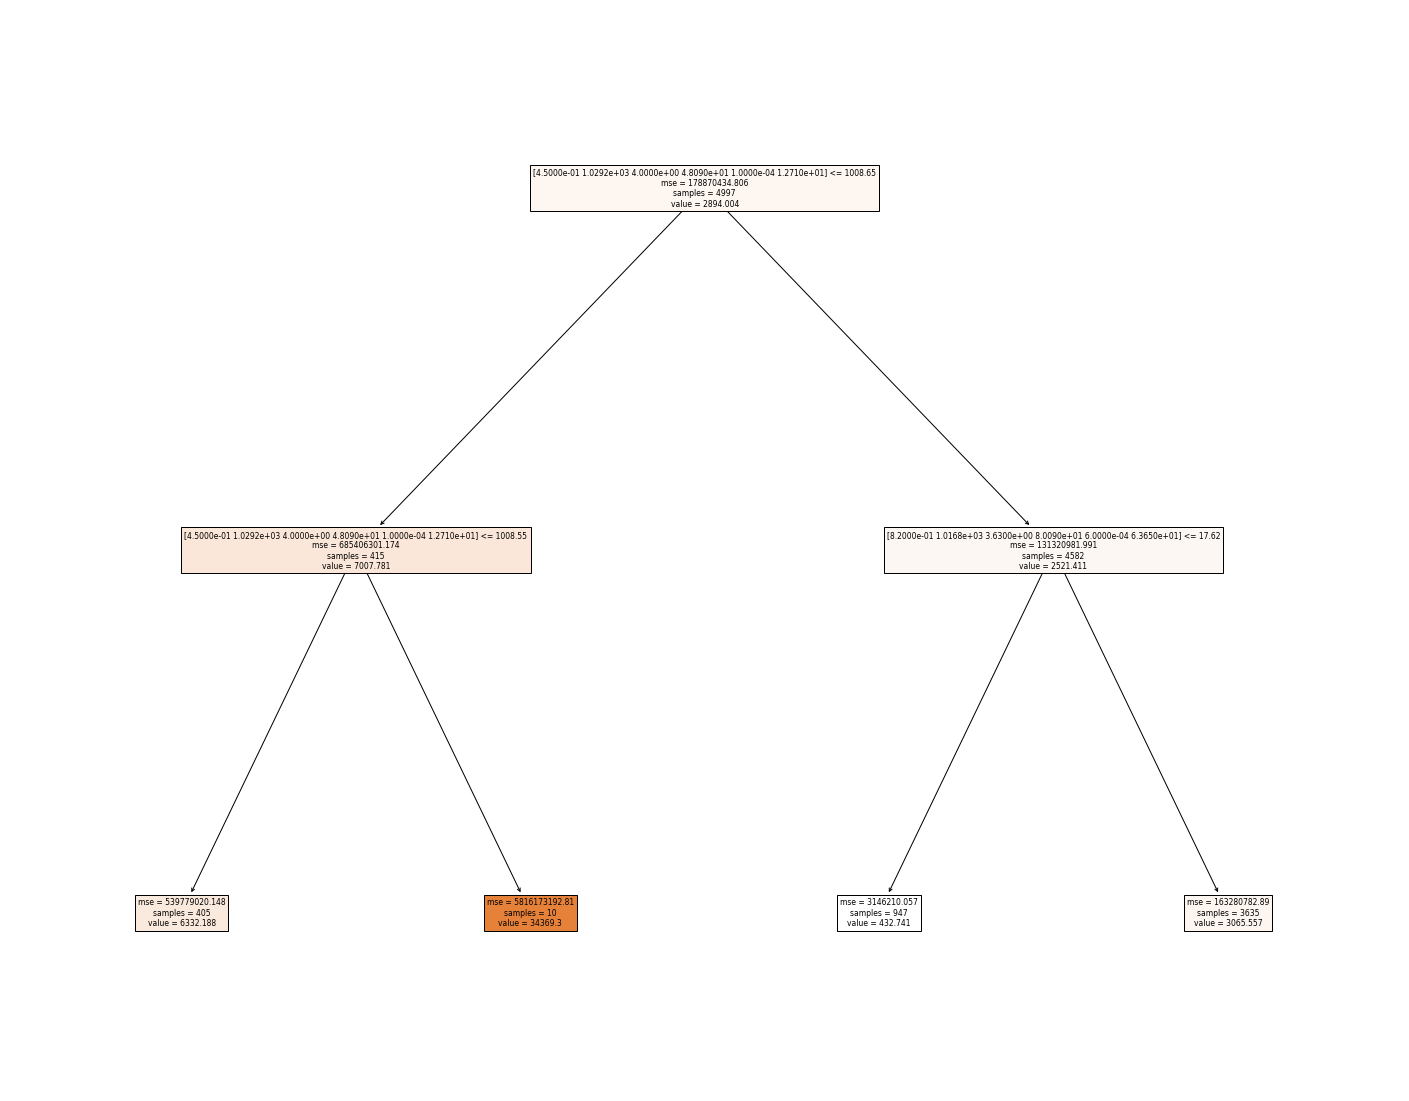

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree1, 
                   feature_names=x.values,  
                   class_names=y.values,
                   filled=True)

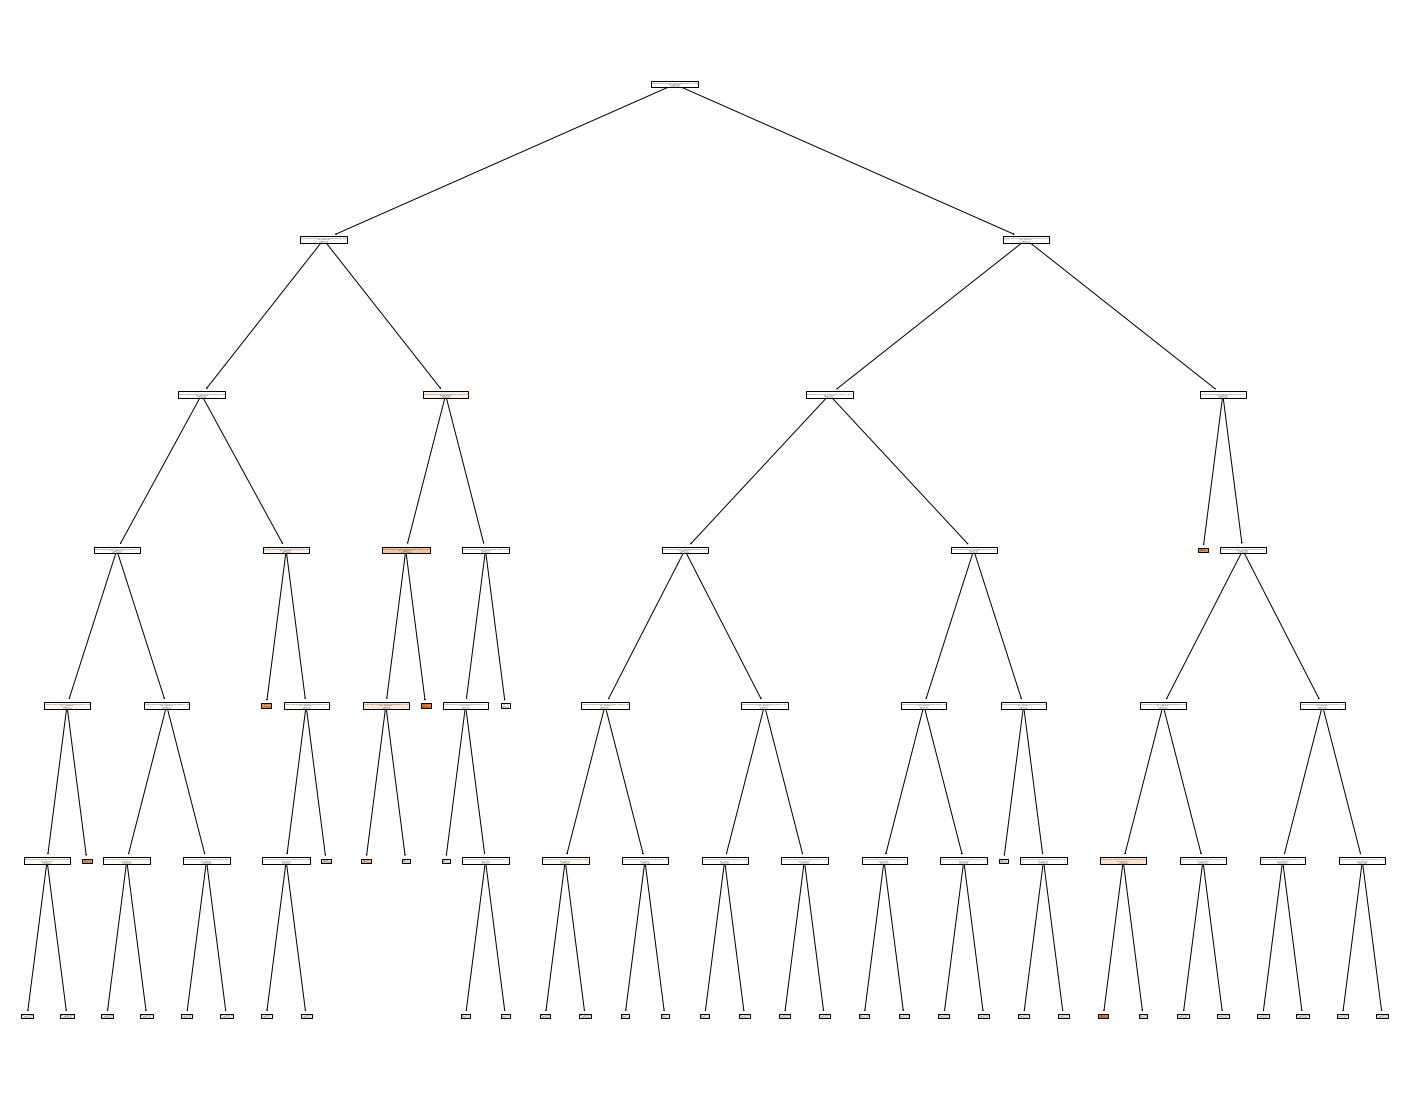

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree2, 
                   feature_names=x.values,  
                   class_names=y.values,
                   filled=True)

## SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

# SVM (Linear)
x = data5.iloc[:,6:12]
y = data5['Confirmed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = SVC(kernel='linear')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
percentage = model.score(x_test, y_test)

from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(x_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[ 0  9  5 ...  0  0  0]
 [ 0 40  4 ...  0  0  0]
 [ 0  8  5 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Test Set: 1875
Accuracy = 6.986666666666666 %


In [ ]:
# SVM (rbf)
x = data5.iloc[:,6:12]
y = data5['Confirmed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = SVC(kernel='rbf')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
percentage = model.score(x_test, y_test)

from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(x_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[ 0 23  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]
Test Set: 1875
Accuracy = 3.0933333333333333 %
